콘크리트 강도를 예측하는 랜덤 포레스트 모델을 만들고 predict method를 이용하여 예측값을 구하라. 그리고 모델의 mse와 mae를 산출하여 비교하라. \
데이터: Concrete.CSV(변수 9개, 자료 수 :1,030개) 목표변수(Concrete_compressive_strength)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.model_selection import GridSearchCV

In [72]:
df_raw=pd.read_csv("Concrete.csv",engine='python')
df_raw.head()

,CEMENT,BLAST_FURNACE_SLAG,FLY_ASH,WATER,SUPERPLASTICIZER,COARSE_AGGREGATE,FINE_AGGREGATE,AGE,CONCRETE_COMPRESSIVE_STRENGTH
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [73]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CEMENT                         1030 non-null   float64
 1   BLAST_FURNACE_SLAG             1030 non-null   float64
 2   FLY_ASH                        1030 non-null   float64
 3   WATER                          1030 non-null   float64
 4   SUPERPLASTICIZER               1030 non-null   float64
 5   COARSE_AGGREGATE               1030 non-null   float64
 6   FINE_AGGREGATE                 1030 non-null   float64
 7   AGE                            1030 non-null   int64  
 8   CONCRETE_COMPRESSIVE_STRENGTH  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [74]:
df_raw.corr().round(3)

,CEMENT,BLAST_FURNACE_SLAG,FLY_ASH,WATER,SUPERPLASTICIZER,COARSE_AGGREGATE,FINE_AGGREGATE,AGE,CONCRETE_COMPRESSIVE_STRENGTH
CEMENT,1.000,-0.275,-0.397,-0.082,0.092,-0.109,-0.223,0.082,0.498
BLAST_FURNACE_SLAG,-0.275,1.000,-0.324,0.107,0.043,-0.284,-0.282,-0.044,0.135
FLY_ASH,-0.397,-0.324,1.000,-0.257,0.378,-0.010,0.079,-0.154,-0.106
WATER,-0.082,0.107,-0.257,1.000,-0.658,-0.182,-0.451,0.278,-0.290
SUPERPLASTICIZER,0.092,0.043,0.378,-0.658,1.000,-0.266,0.223,-0.193,0.366
COARSE_AGGREGATE,-0.109,-0.284,-0.010,-0.182,-0.266,1.000,-0.178,-0.003,-0.165
FINE_AGGREGATE,-0.223,-0.282,0.079,-0.451,0.223,-0.178,1.000,-0.156,-0.167
AGE,0.082,-0.044,-0.154,0.278,-0.193,-0.003,-0.156,1.000,0.329
CONCRETE_COMPRESSIVE_STRENGTH,0.498,0.135,-0.106,-0.290,0.366,-0.165,-0.167,0.329,1.000


In [75]:
df_raw_x = df_raw.drop("CONCRETE_COMPRESSIVE_STRENGTH", axis=1)
df_raw_y = df_raw["CONCRETE_COMPRESSIVE_STRENGTH"]
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size=0.3, random_state=1234)
df_train_x, df_validation_x, df_train_y, df_validation_y = train_test_split(df_raw_x, df_raw_y, test_size=(3/7), random_state=1234)
print("train data X size:{}".format(df_train_x.shape))
print("train data Y size:{}".format(df_train_y.shape))
print("test data X size:{}".format(df_test_x.shape))
print("test data Y size:{}".format(df_test_y.shape))

train data X size:(588, 8)
train data Y size:(588,)
test data X size:(309, 8)
test data Y size:(309,)


In [76]:
rf_uncustomized = RFR(random_state=1234)
rf_uncustomized.fit(df_train_x, df_train_y)
#Train 데이터 설명력
print("Score on training set:{:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
print("Score on validation set: {:.3f}".format(rf_uncustomized.score(df_validation_x, df_validation_y)))
print("Score on test set:{:.3f}".format(rf_uncustomized.score(df_test_x,df_test_y)))

Score on training set:0.980
Score on validation set: 0.899
Score on test set:0.894


In [77]:
rf_uncustomized

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1234, verbose=0, warm_start=False)

In [101]:
#train 및 test 설명력 결과 저장
train_score=[]; validation_score = []

#n_estimators: 트리 수 변경:1~100, *참조: para_n_tree: [1, 2, 3, ..., 10]
para_n_tree = [n_tree *10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    rf=RFR(n_estimators=v_n_estimators, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    validation_score.append(rf.score(df_validation_x, df_validation_y))
    
#결과 저장
df_score_n = pd.DataFrame()
df_score_n["n_estimators"]=para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"]=validation_score

In [102]:
df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.974,0.885
1,20,0.977,0.892
2,30,0.979,0.898
3,40,0.979,0.899
4,50,0.980,0.898
5,60,0.979,0.899
6,70,0.980,0.900
7,80,0.979,0.899
8,90,0.980,0.899
9,100,0.980,0.899


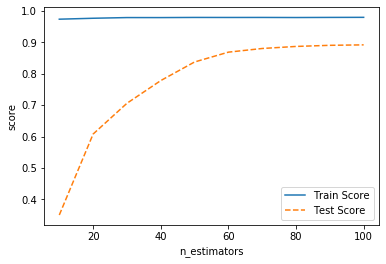

In [103]:
plt.plot(para_n_tree, train_score, linestyle='-', label='Train Score')
plt.plot(para_n_tree, test_score, linestyle='--', label='Test Score')
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()

#n_estimators를 70으로 설정한다

In [104]:
#train 및 test 설명력 결과 저장
train_score=[]; validation_score = []

#min_samples_leaf: 잎사귀 최소 자료 수 *참조: para_leaf: [1,2,3,...,20]
para_leaf= [n_leaf *1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    rf=RFR(random_state=1234, n_estimators=70, min_samples_leaf=v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    validation_score.append(rf.score(df_validation_x, df_validation_y))


In [107]:
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf']=para_leaf
df_score_leaf["TrainScore"]=train_score
df_score_leaf["ValidationScore"]=validation_score

In [108]:
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,ValidationScore
0,1,0.980,0.900
1,2,0.966,0.894
2,3,0.951,0.889
3,4,0.937,0.881
4,5,0.924,0.869
5,6,0.911,0.861
6,7,0.902,0.854
7,8,0.893,0.846
8,9,0.884,0.838
9,10,0.877,0.830


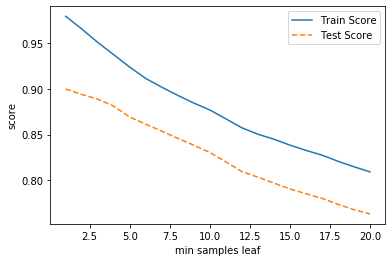

In [110]:
plt.plot(para_leaf, train_score, linestyle='-', label='Train Score')
plt.plot(para_leaf, validation_score, linestyle='--', label='Test Score')
plt.ylabel('score'); plt.xlabel('min samples leaf')
plt.legend()

In [111]:
#train 및 test 설명력 결과 저장
train_score=[] ; validation_score=[]

#min_samples_split:분할하기 위한 노드의 최소 자료 수
para_split = [n_split*2 for n_split in range(2,21)]

for v_min_samples_split in para_split:
    rf=RFR(random_state=1234, n_estimators=70, min_samples_leaf=1, min_samples_split=v_min_samples_split)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    validation_score.append(rf.score(df_validation_x, df_validation_y))
    
df_score_split = pd.DataFrame()
df_score_split['MinSamplesSplit']=para_split
df_score_split["TrainScore"]=train_score
df_score_split["ValidationScore"]=validation_score

In [112]:
df_score_split.round(3)

,MinSamplesSplit,TrainScore,ValidationScore
0,4,0.974,0.900
1,6,0.967,0.896
2,8,0.959,0.889
3,10,0.950,0.883
4,12,0.939,0.876
5,14,0.930,0.869
6,16,0.922,0.864
7,18,0.915,0.858
8,20,0.907,0.850
9,22,0.901,0.844


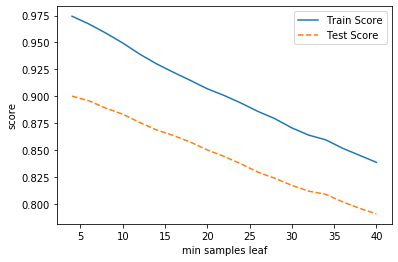

In [113]:
plt.plot(para_split, train_score, linestyle='-', label='Train Score')
plt.plot(para_split, validation_score, linestyle='--', label='Test Score')
plt.ylabel('score'); plt.xlabel('min samples leaf')
plt.legend()

In [119]:
#train 및 test 설명력 결과 저장
train_score=[] ; validation_score=[]

#min_samples_split:분할하기 위한 노드의 최소 자료 수
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    rf=RFR(random_state=1234, n_estimators=70, min_samples_leaf=1, min_samples_split=4,\
           max_depth=v_max_depth)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    validation_score.append(rf.score(df_validation_x, df_validation_y))
    
df_score_depth = pd.DataFrame()
df_score_depth['Depth']=para_depth
df_score_depth["TrainScore"]=train_score
df_score_depth["ValidationScore"]=validation_score

In [120]:
df_score_depth.round(3)

,Depth,TrainScore,ValidationScore
0,1,0.356,0.352
1,2,0.626,0.599
2,3,0.741,0.697
3,4,0.825,0.774
4,5,0.890,0.838
5,6,0.927,0.870
6,7,0.948,0.883
7,8,0.961,0.892
8,9,0.968,0.895
9,10,0.971,0.897


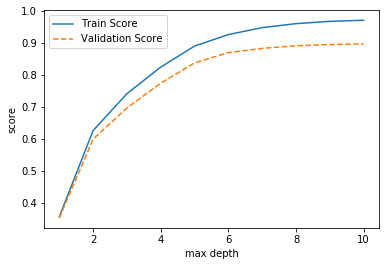

In [122]:
plt.plot(para_depth, train_score, linestyle='-', label='Train Score')
plt.plot(para_depth, validation_score, linestyle='--', label='Validation Score')
plt.ylabel('score'); plt.xlabel('max depth')
plt.legend()

In [123]:
rf_final=RFR(random_state=1234, n_estimators=20, min_samples_leaf=1, min_samples_split=4, max_depth=10)
rf_final.fit(df_train_x, df_train_y)

print("Score on training set: {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(rf_final.score(df_test_x, df_test_y)))

Score on training set: 0.969
Score on test set: 0.877


In [124]:
rf_final

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=4, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=1234, verbose=0, warm_start=False)

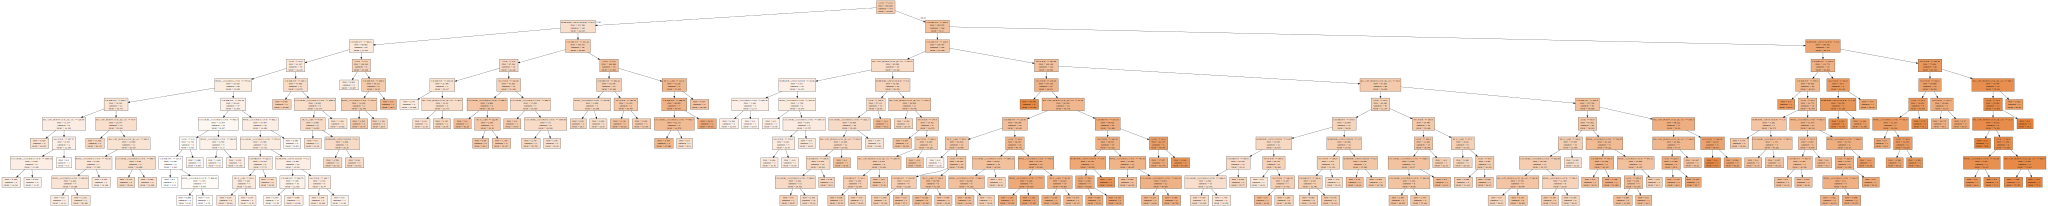

In [125]:
v_feature_name = df_train_x.columns

export_graphviz(rf_final.estimators_[0], out_file="rfr_final_0.dot", feature_names = v_feature_name, \
               impurity=True, filled=True)
with open("rfr_final_0.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [126]:
df_importance=pd.DataFrame()
df_importance["Feature"]=v_feature_name
df_importance["Importance"]=rf_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
7,AGE,0.350
0,CEMENT,0.276
3,WATER,0.143
4,SUPERPLASTICIZER,0.076
1,BLAST_FURNACE_SLAG,0.067
6,FINE_AGGREGATE,0.042
5,COARSE_AGGREGATE,0.031
2,FLY_ASH,0.014


Text(0, 0.5, '변수')

/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: Runtim

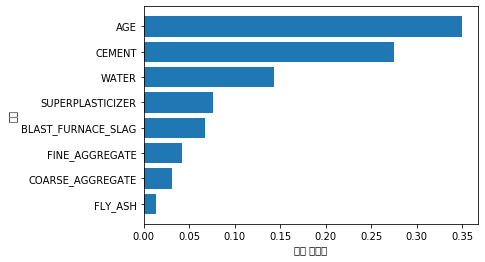

In [95]:
df_importance.sort_values("Importance",ascending=True, inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates, width=df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

In [97]:
# estimator = RFR(random_state=1234)
# param_grid={"max_depth":para_depth, "min_samples_split":para_split, "min_samples_leaf":para_leaf}

# grid_dt=GridSearchCV(estimator, param_grid, scoring='r2', n_jobs=-1)
# grid_dt.fit(df_train_x, df_train_y)

# print("best estimator model:\n{}".format(grid_dt.best_estimator_))
# print("\nbest parameter:\n{}".format(grid_dt.best_params_))
# print("\nbest score:\n{}".format(grid_dt.best_score_.round(3)))

In [127]:
from sklearn.metrics import mean_squared_error

from sklearn.metrics import mean_absolute_error

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

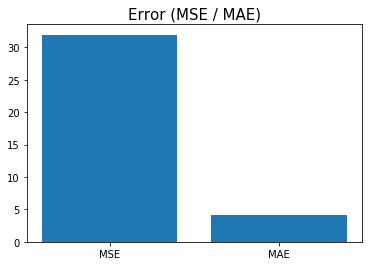

In [128]:
models = ['MSE','MAE']

evalresult = []

dt_y_pred = rf_final.predict(df_test_x)

evalresult.append(mean_squared_error(df_test_y, dt_y_pred))
evalresult.append(mean_absolute_error(df_test_y, dt_y_pred))

plt.bar(models, evalresult)
plt.title("Error (MSE / MAE)").set_fontsize(15)

In [1]:
#데이터 구성:Series, DataFrame
import pandas as pd

#데이터 시각화
import matplotlib.pyplot as plt
import matplotlib

#export_graphviz: 나무 구조 생성 및 저장
from sklearn.tree import export_graphviz

#graphviz: 나무 구조 시각화 (.dot 확장자 파일 불러오기 등)
import graphviz

#데이터 분할:train, test
from sklearn.model_selection import train_test_split

# 그래디언트 예측 모델
from sklearn.ensemble import GradientBoostingRegressor as GBR

#최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

In [4]:
df_raw = pd.read_csv('Concrete.csv', engine='python',encoding='cp949')
df_raw

,CEMENT,BLAST_FURNACE_SLAG,FLY_ASH,WATER,SUPERPLASTICIZER,COARSE_AGGREGATE,FINE_AGGREGATE,AGE,CONCRETE_COMPRESSIVE_STRENGTH
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [5]:
# 목표변수, 설명변수 데이터 지정
df_raw_y =df_raw["CONCRETE_COMPRESSIVE_STRENGTH"]
df_raw_x =df_raw.drop("CONCRETE_COMPRESSIVE_STRENGTH", axis=1, inplace = False)

# train_test_split 함수를 이용하여 train:test로 데이터 분할. 
# 분할된 train 데이터를 재 분할하여 validation 데이터로 사용
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size=0.3, random_state=1234)
df_train_x, validation_x, df_train_y, validation_y = train_test_split(df_raw_x, df_raw_y, test_size=3/7, random_state=1234)


#  1. train 데이터: 모델 훈련 
#  2. validation 데이터: 최적의 parameter 찾기(과정의 [연습/실습]에서 test 데이터 역할)
#  3. test 데이터: 2에서 찾은 최적의 parameter를 이용하여 만든 모델로 최종 성능 확인(단 한 번만 사용할 것)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

print("validation data V size : {}".format(validation_x.shape))
print("validation data V size : {}".format(validation_y.shape))

train data X size : (588, 8)
train data Y size : (588,)
test data X size : (309, 8)
test data Y size : (309,)
validation data V size : (442, 8)
validation data V size : (442,)


In [6]:
# 모델 생성
tree_uncustomized = GBR(random_state=1234)
tree_uncustomized.fit(df_train_x, df_train_y)

# Train 데이터 설명력
print('Score on training set :{:.3f}'.format(tree_uncustomized.score(df_train_x,\
                                                                    df_train_y)))

# Validation 데이터 설명력
print('Score on validation set :{:.3f}'.format(tree_uncustomized.score(validation_x,\
                                                                    validation_y)))

# Test 데이터 설명력
print("Score on test set:{:.3f}".format(tree_uncustomized.score(df_test_x, \
                                                               df_test_y)))


Score on training set :0.952
Score on validation set :0.908
Score on test set:0.909


In [7]:
# n_estimators 트리 수 변경에 따른 모델 성능

train_score = []; validation_score = []

para_n_tree = [n_tree * 10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    gb = GBR(random_state=1234, n_estimators=v_n_estimators)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    validation_score.append(gb.score(validation_x, validation_y))
   
   
df_score_n = pd.DataFrame()
df_score_n["MinSamplesLeaf"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["ValidationScore"] = validation_score

df_score_n.round(3)

,MinSamplesLeaf,TrainScore,ValidationScore
0,10,0.645,0.618
1,20,0.806,0.773
2,30,0.869,0.833
3,40,0.899,0.860
4,50,0.917,0.877
5,60,0.928,0.887
6,70,0.935,0.893
7,80,0.942,0.899
8,90,0.947,0.903
9,100,0.952,0.908


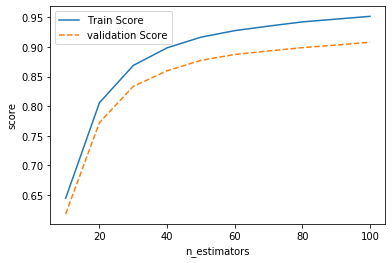

In [8]:
# 그래프 ->60 선택
plt.plot(para_n_tree, train_score, linestyle='-', label='Train Score')
plt.plot(para_n_tree, validation_score, linestyle='--', label='validation Score')
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()

In [10]:
# 잎사귀 노드의 최소 자료 수 변경에 따른 모델 성능

#train 및 test 설명력 결과 저장
train_score = []; validation_score = []

#n_estimators: 트리 수 변경:1~100, *참조: para_n_tree: [1, 2, 3, ..., 10]
para_leaf = [n_leaf *1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    rf=GBR(random_state=1234, n_estimators=60,
           min_samples_leaf = v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    validation_score.append(rf.score(validation_x, validation_y))
    
# 결과저장
df_score_leaf = pd.DataFrame()
df_score_leaf["n_estimators"]=para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["validationScore"]= validation_score

df_score_leaf.round(3)

,n_estimators,TrainScore,validationScore
0,1,0.928,0.887
1,2,0.927,0.889
2,3,0.924,0.887
3,4,0.923,0.886
4,5,0.921,0.887
5,6,0.921,0.888
6,7,0.920,0.886
7,8,0.919,0.884
8,9,0.918,0.886
9,10,0.919,0.888


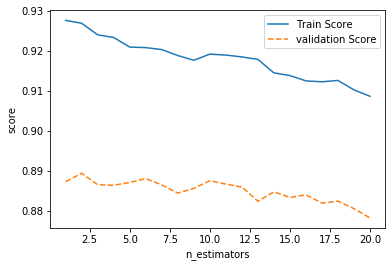

In [11]:
# 띄우기
plt.plot(para_leaf, train_score, linestyle='-', label='Train Score')
plt.plot(para_leaf, validation_score, linestyle='--', label='validation Score')
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()

In [12]:
# min_samples_split: 분리 노드의 최소 자료 수 변경에 따른 모델 성능

#train 및 test 설명력 결과 저장
train_score = []; validation_score = []

#n_estimators: 트리 수 변경:1~100, *참조: para_n_tree: [1, 2, 3, ..., 10]
para_split = [n_split *2 for n_split in range(1,21)]

for v_min_samples_split in para_split:
    gb=GBR(random_state=1234, n_estimators=60, min_samples_split = v_min_samples_split)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    validation_score.append(gb.score(validation_x, validation_y))
    
# 결과저장
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"]=para_split
df_score_split["TrainScore"] = train_score
df_score_split["validationScore"]=validation_score

df_score_split.round(3)

,MinSamplesSplit,TrainScore,validationScore
0,2,0.928,0.887
1,4,0.928,0.887
2,6,0.927,0.887
3,8,0.927,0.887
4,10,0.926,0.884
5,12,0.925,0.884
6,14,0.925,0.886
7,16,0.924,0.886
8,18,0.924,0.886
9,20,0.924,0.886


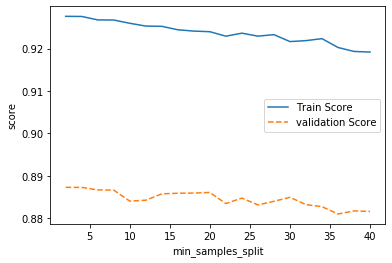

In [13]:
# 띄우기->30
plt.plot(para_split, train_score, linestyle='-', label='Train Score')
plt.plot(para_split, validation_score, linestyle='--', label='validation Score')
plt.ylabel("score"); plt.xlabel("min_samples_split")
plt.legend()

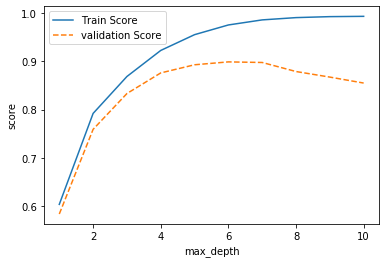

In [14]:
# max_depth: 최대 깊이 변경에 따른 모델 성능

#train 및 test 설명력 결과 저장
train_score = []; validation_score = []

#n_estimators: 트리 수 변경:1~100, *참조: para_n_tree: [1, 2, 3, ..., 10]
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    gb=GBR(random_state=1234, n_estimators=60, max_depth = v_max_depth)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    validation_score.append(gb.score(validation_x, validation_y))
    
# 결과저장
df_score_depth = pd.DataFrame()
df_score_depth["max_depth"]=para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["validationScore"]=validation_score

# 띄우기
plt.plot(para_depth, train_score, linestyle='-', label='Train Score')
plt.plot(para_depth, validation_score, linestyle='--', label='validation Score')
plt.ylabel("score"); plt.xlabel("max_depth")
plt.legend()

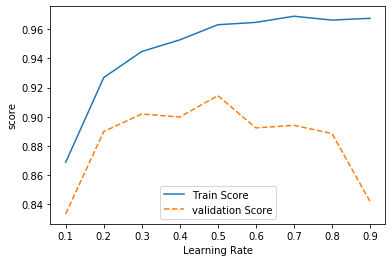

In [15]:
# learning_date: 학습률 변경에 따른 모델 성능->5선택

#train 및 test 설명력 결과 저장
train_score = []; validation_score = []

#n_estimators: 트리 수 변경:1~100, *참조: para_n_tree: [1, 2, 3, ..., 10]
para_lr = [lr*0.1 for lr in range(1,10)]

for v_learning_rate in para_lr:
    gb=GBR(random_state=1234, n_estimators=60, learning_rate = v_learning_rate)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    validation_score.append(gb.score(validation_x, validation_y))
    
# 결과저장
df_score_lr = pd.DataFrame()
df_score_lr["LearningRate"]=para_lr
df_score_lr["TrainScore"] = train_score
df_score_lr["validationScore"]=validation_score

# 띄우기
plt.plot(para_lr, train_score, linestyle='-', label='Train Score')
plt.plot(para_lr, validation_score, linestyle='--', label='validation Score')
plt.ylabel("score"); plt.xlabel("Learning Rate")
plt.legend()

In [16]:
# 결론 도출 - 최종모델 생성
gb_final = GBR(random_state=1234, n_estimators=60, min_samples_leaf=10, 
               min_samples_split=30, max_depth=5, learning_rate=0.5)
gb_final.fit(df_train_x, df_train_y)

#Train, Test 데이터 설명력
#Train 데이터 설명력
print("Score on training set:{:.3f}".format(gb_final.score(df_train_x, df_train_y)))

#test 데이터 설명력
print("Score on validation set:{:.3f}".format(gb_final.score(validation_x, validation_y)))

Score on training set:0.985
Score on validation set:0.912


Text(0, 0.5, '변수')

/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: Runtim

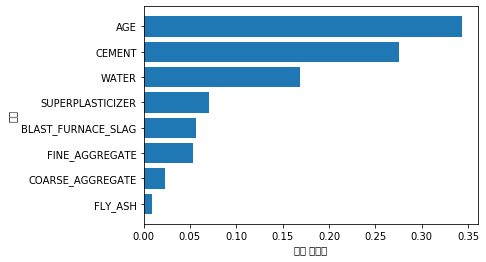

In [17]:
# 변수명 저장
v_feature_name =df_train_x.columns

df_importance=pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = gb_final.feature_importances_

#df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)

# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance",ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates,width = df_importance['Importance'])
plt.yticks(coordinates,df_importance['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

In [26]:
#평가함수
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [27]:
#Gradient Boosting
gb_model=GBR(random_state=1234,n_estimators=100,min_samples_leaf=7,min_samples_split=30,max_depth=7,learning_rate=0.4)
gb_model.fit(df_train_x,df_train_y)

GradientBoostingRegressor(learning_rate=0.4, max_depth=7, min_samples_leaf=7,
                          min_samples_split=30, random_state=1234)

In [32]:
#예측
rf_y_pred=gb_final.predict(df_test_x)

#평가
mse.append(mean_squared_error(df_test_y,rf_y_pred))

mae.append(mean_absolute_error(df_test_y,rf_y_pred))


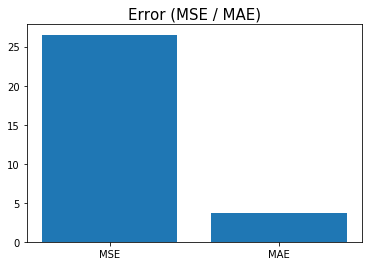

In [36]:
models = ['MSE','MAE']

evalresult = []

dt_y_pred = gb_final.predict(df_test_x)

evalresult.append(mean_squared_error(df_test_y, dt_y_pred))
evalresult.append(mean_absolute_error(df_test_y, dt_y_pred))

plt.bar(models, evalresult)
plt.title("Error (MSE / MAE)").set_fontsize(15)